In [330]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import pickle

In [271]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [272]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [273]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [274]:
df.shape

(8124, 23)

In [275]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [276]:
le = LabelEncoder()
df2 = le.fit_transform(df['class'])
df['class'] = df2
df = (df.apply(le.fit_transform))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [101]:
#ohe = OneHotTransform()
#ct = make_column_transformer((ohe,['class']),remainder='passthrough')
#encoded = pd.DataFrame(ct.fit_transform(df))
#encoded

In [277]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


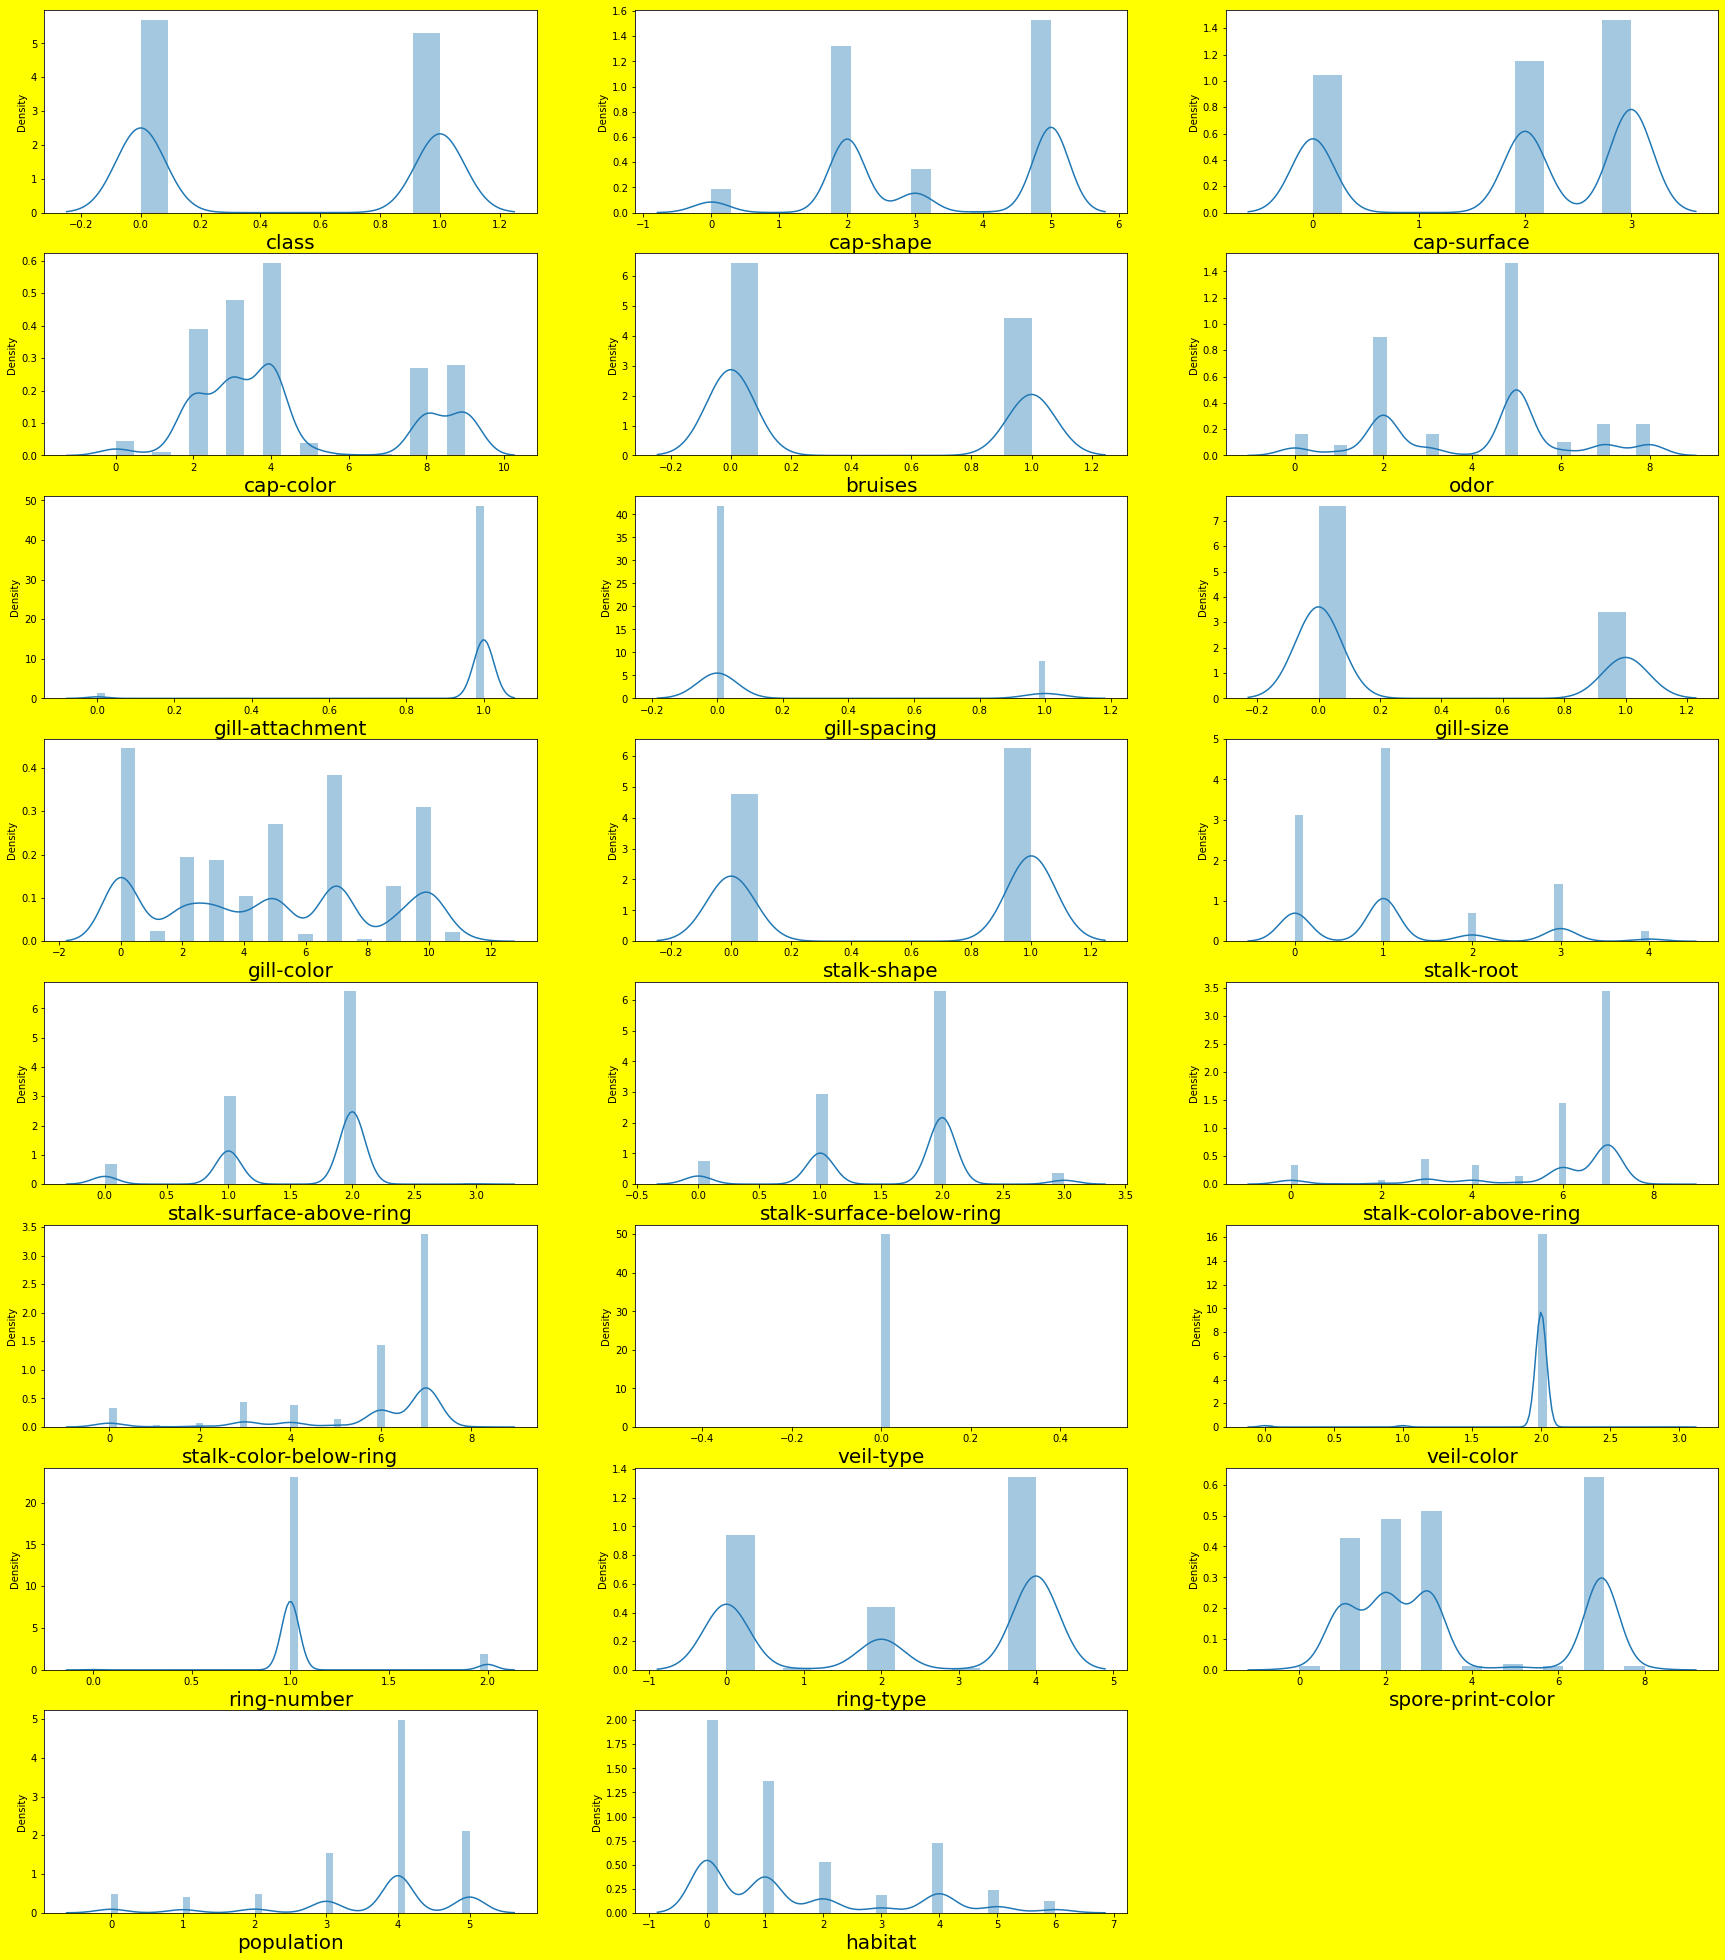

In [278]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=23:
        plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can see some skewness from the above graphs

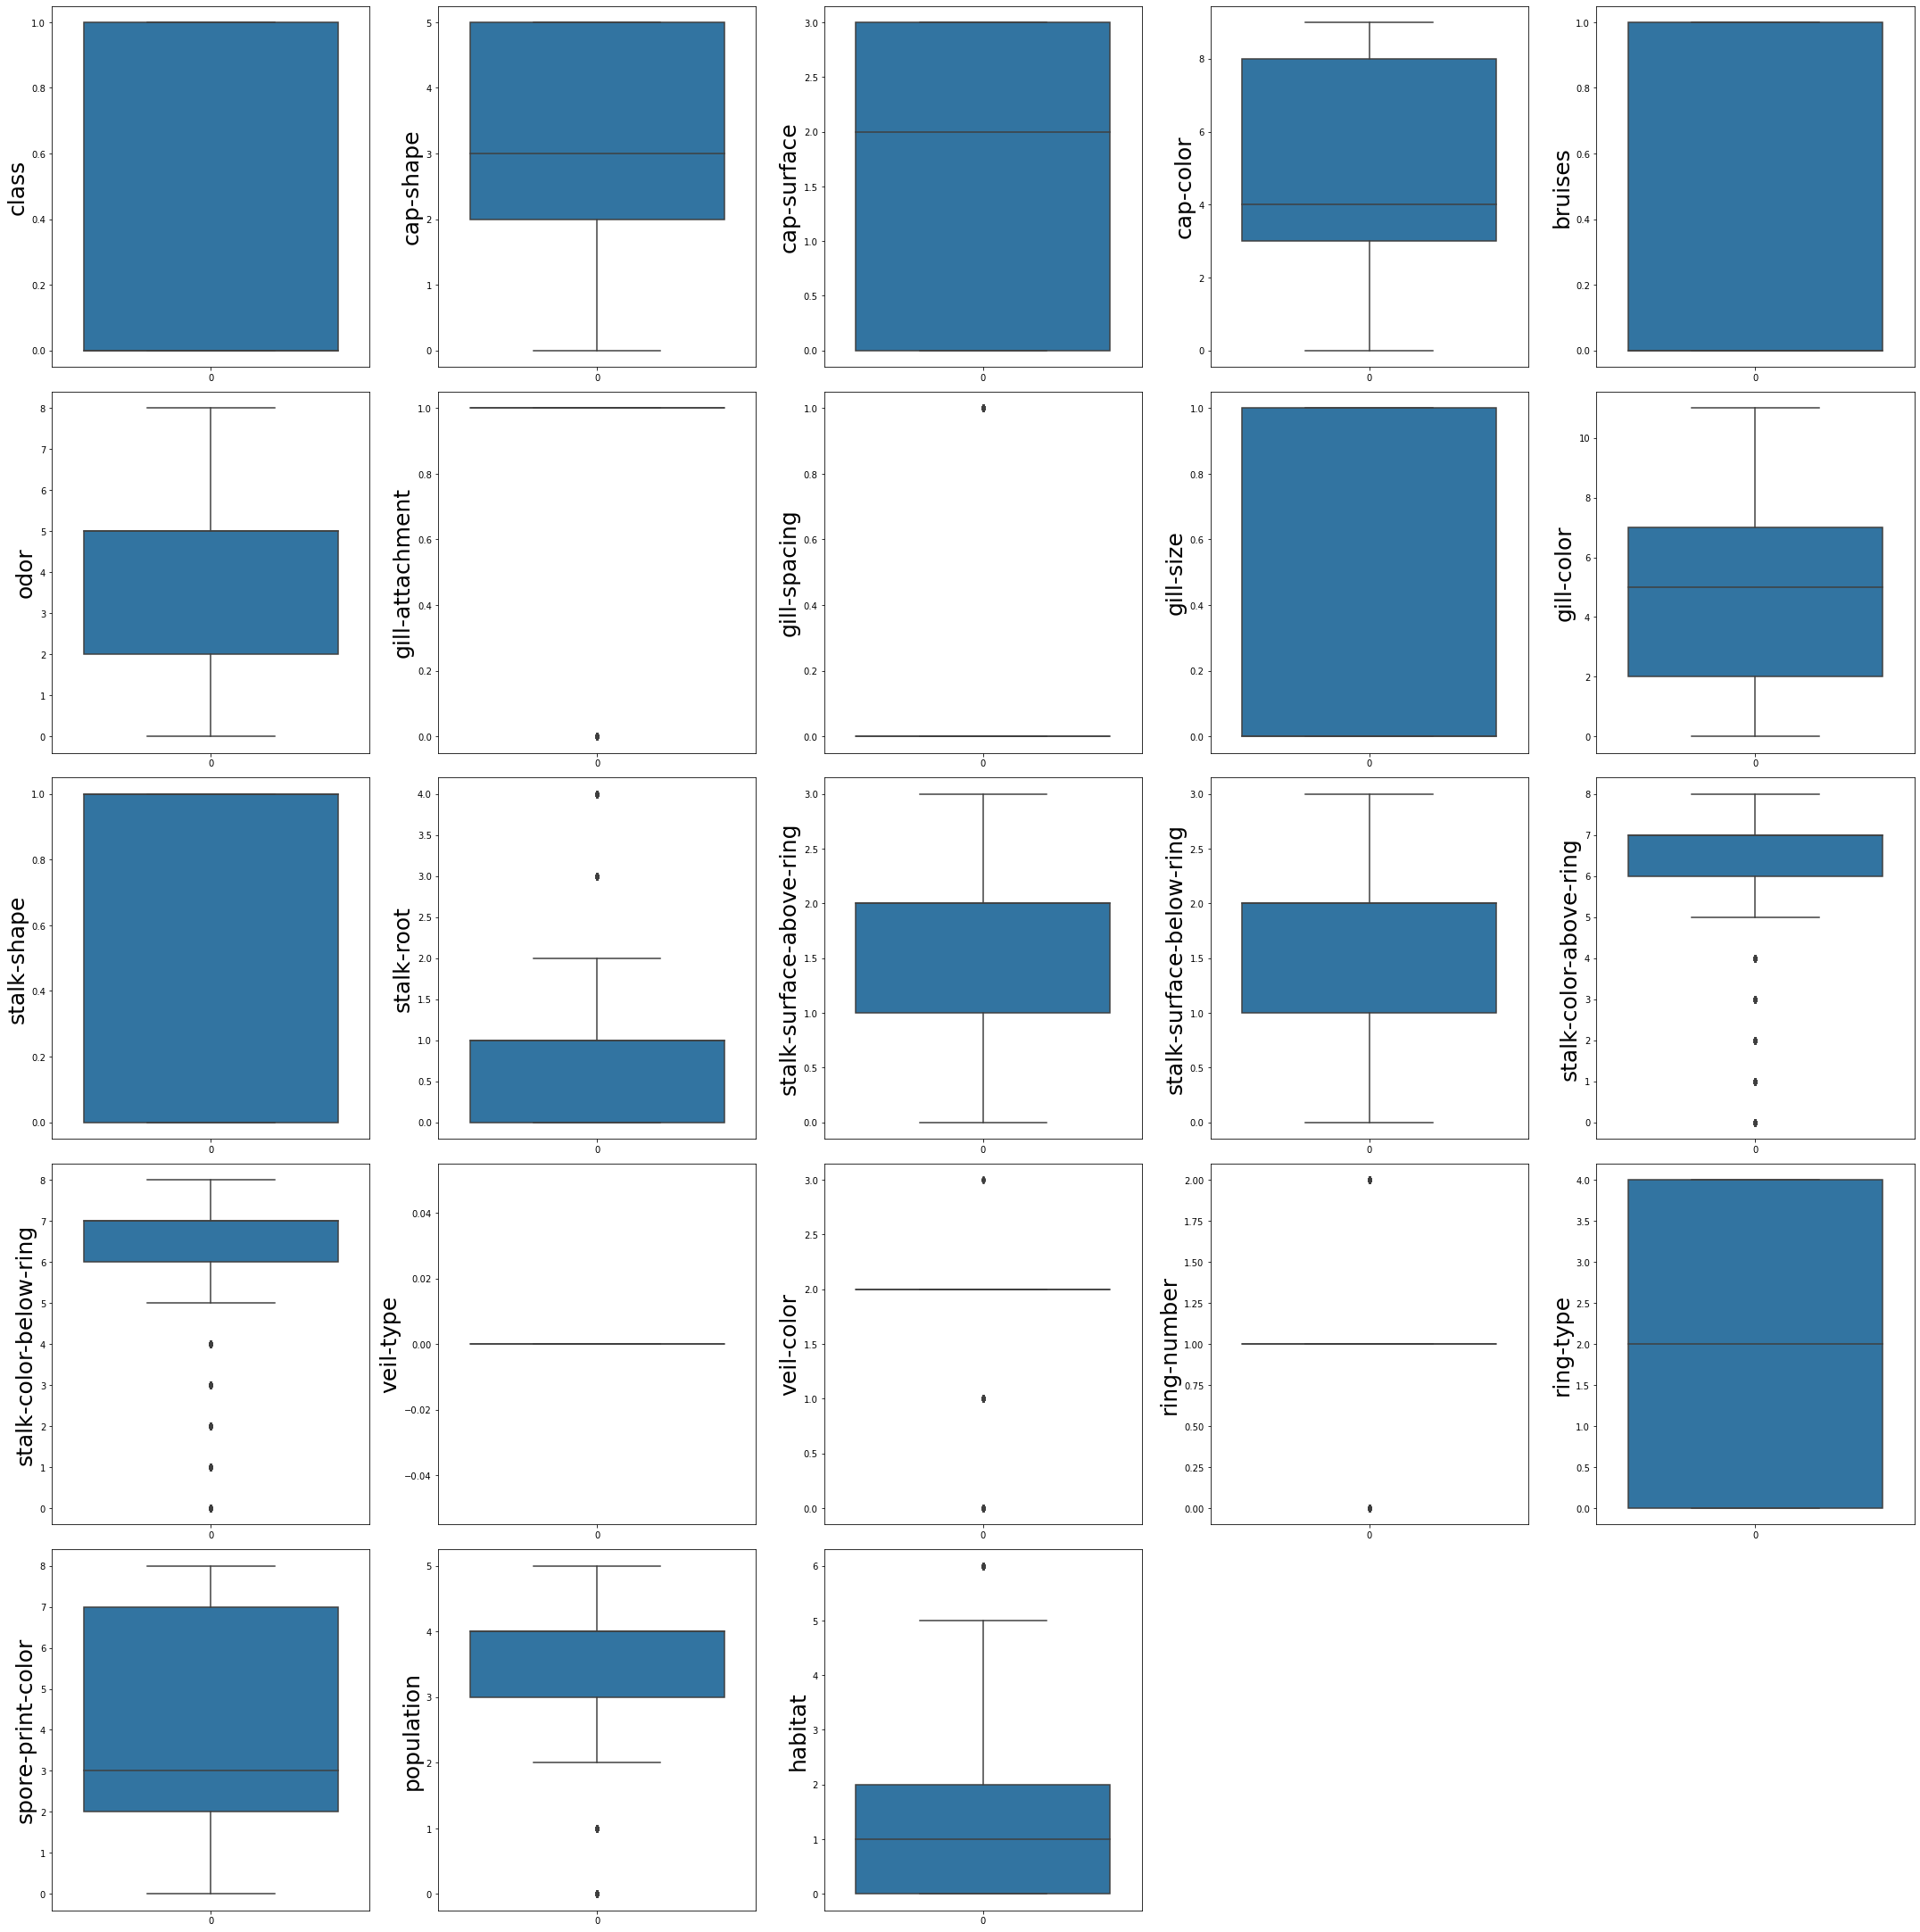

In [279]:
collist=df.columns.values
ncol=30
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,23):
    plt.subplot(nrows,5,i+1)
    sns.boxplot(data=df[collist[i]])
    plt.ylabel(collist[i],fontsize=25)
    plt.tight_layout()

In [280]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Outcome of the skewness: Skewness thrshold is taken as -0.8 to +0.8.Columns which are having skewness are:<br>
gill-attachment<br>
gill-spacing<br>
stalk-root<br>
stalk-color-above-ring<br>
stalk-color-below-ring<br>
veil-color<br>
ring-number<br>
population<br>
habitat<br>

In [281]:
df = df.set_axis(['class','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                  'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                  'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type',
                  'spore_print_color','population','habitat'], axis=1)
 
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [282]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [283]:
ga_low = (q1.gill_attachment-(1.5*iqr.gill_attachment))
print(ga_low)
index = np.where(df['gill_attachment'] < ga_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0
(7914, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,4,0,5,2,3,0,5,1,1,0,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7909,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
7910,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
7911,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
7912,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [284]:
gs_high = (q3.gill_spacing+(1.5*iqr.gill_spacing))
print(gs_high)
index = np.where(df['gill_spacing'] > gs_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.0
(6602, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6597,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
6598,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
6599,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6600,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [258]:
sr_high = (q3.stalk_root+(1.5*iqr.stalk_root))
print(sr_high)
index = np.where(df['stalk_root'] > sr_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.5
(6268, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
1,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
2,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
3,6,0,0,2,8,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,3
4,7,0,0,3,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263,8119,0,3,2,4,0,5,0,0,0,...,2,5,5,0,1,1,4,0,1,2
6264,8120,0,5,2,4,0,5,0,0,0,...,2,5,5,0,0,1,4,0,4,2
6265,8121,0,2,2,4,0,5,0,0,0,...,2,5,5,0,1,1,4,0,1,2
6266,8122,1,3,3,4,0,8,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [285]:
scar_low = (q1.stalk_color_above_ring-(1.5*iqr.stalk_color_above_ring))
print(scar_low)
index = np.where(df['stalk_color_above_ring'] < scar_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

4.5
(5032, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
5028,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
5029,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
5030,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [286]:
scbr_low = (q1.stalk_color_below_ring-(1.5*iqr.stalk_color_below_ring))
print(scbr_low)
index = np.where(df['stalk_color_below_ring'] < scbr_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

4.5
(4296, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4292,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4293,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4294,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [287]:
vc_low = (q1.veil_color-(1.5*iqr.veil_color))
print(vc_low)
index = np.where(df['veil_color'] < vc_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.0
(4296, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4292,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4293,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4294,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [288]:
vc_high = (q3.veil_color+(1.5*iqr.veil_color))
print(vc_high)
index = np.where(df['veil_color'] > vc_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.0
(4296, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4292,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4293,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4294,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [289]:
rn_low = (q1.ring_number-(1.5*iqr.ring_number))
print(rn_low)
index = np.where(df['ring_number'] < rn_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0
(4296, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4292,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4293,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4294,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [290]:
rn_high = (q3.ring_number+(1.5*iqr.ring_number))
print(rn_high)
index = np.where(df['ring_number'] > rn_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.0
(4144, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4140,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4141,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4142,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [291]:
p_low = (q1.population-(1.5*iqr.population))
print(p_low)
index = np.where(df['population'] < p_low)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

1.5
(4144, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4140,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4141,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4142,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


In [292]:
h_high = (q3.habitat+(1.5*iqr.habitat))
print(h_high)
index = np.where(df['habitat'] > h_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

5.0
(4144, 23)


,index,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,5,0,5,3,9,1,0,1,0,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,8113,1,3,3,2,0,8,1,0,1,...,1,6,6,0,2,1,0,7,4,0
4140,8116,1,3,3,4,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
4141,8117,1,3,2,2,0,8,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4142,8118,1,3,3,4,0,2,1,0,1,...,2,6,7,0,2,1,0,7,4,0


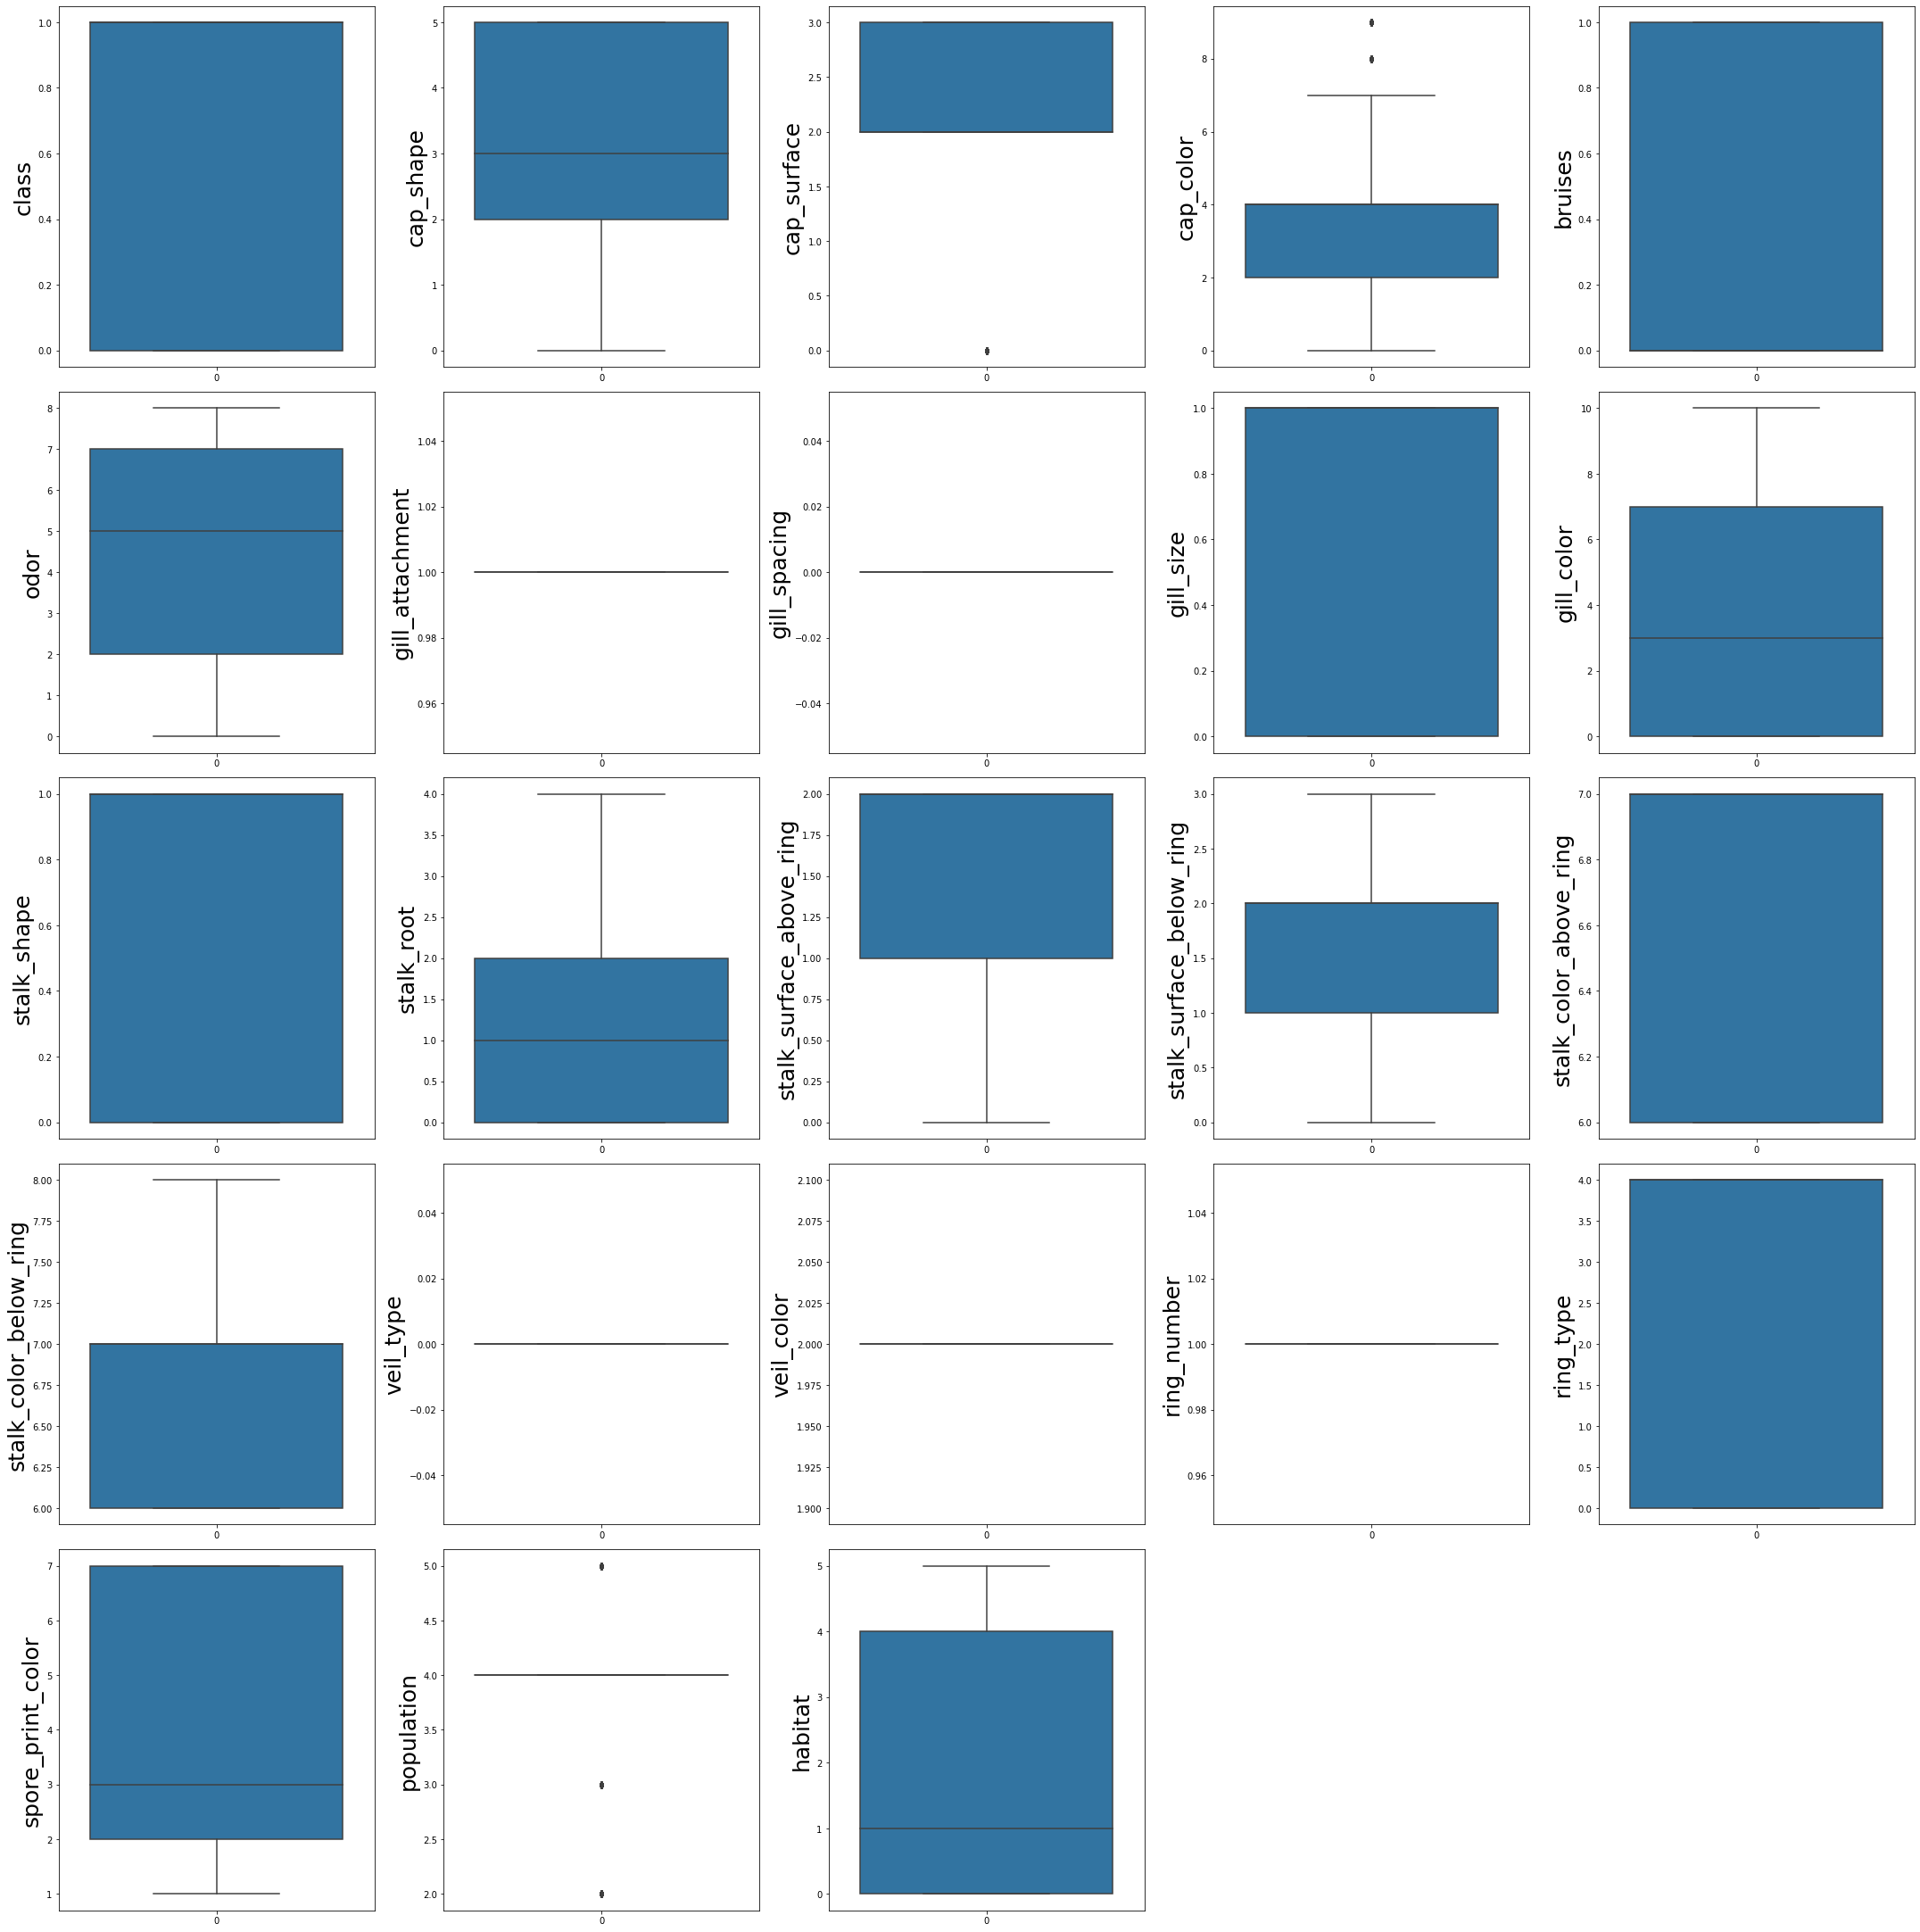

In [293]:
collist=df.columns.values
ncol=30
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,23):
    plt.subplot(nrows,5,i+1)
    sns.boxplot(data=df[collist[i]])
    plt.ylabel(collist[i],fontsize=25)
    plt.tight_layout()

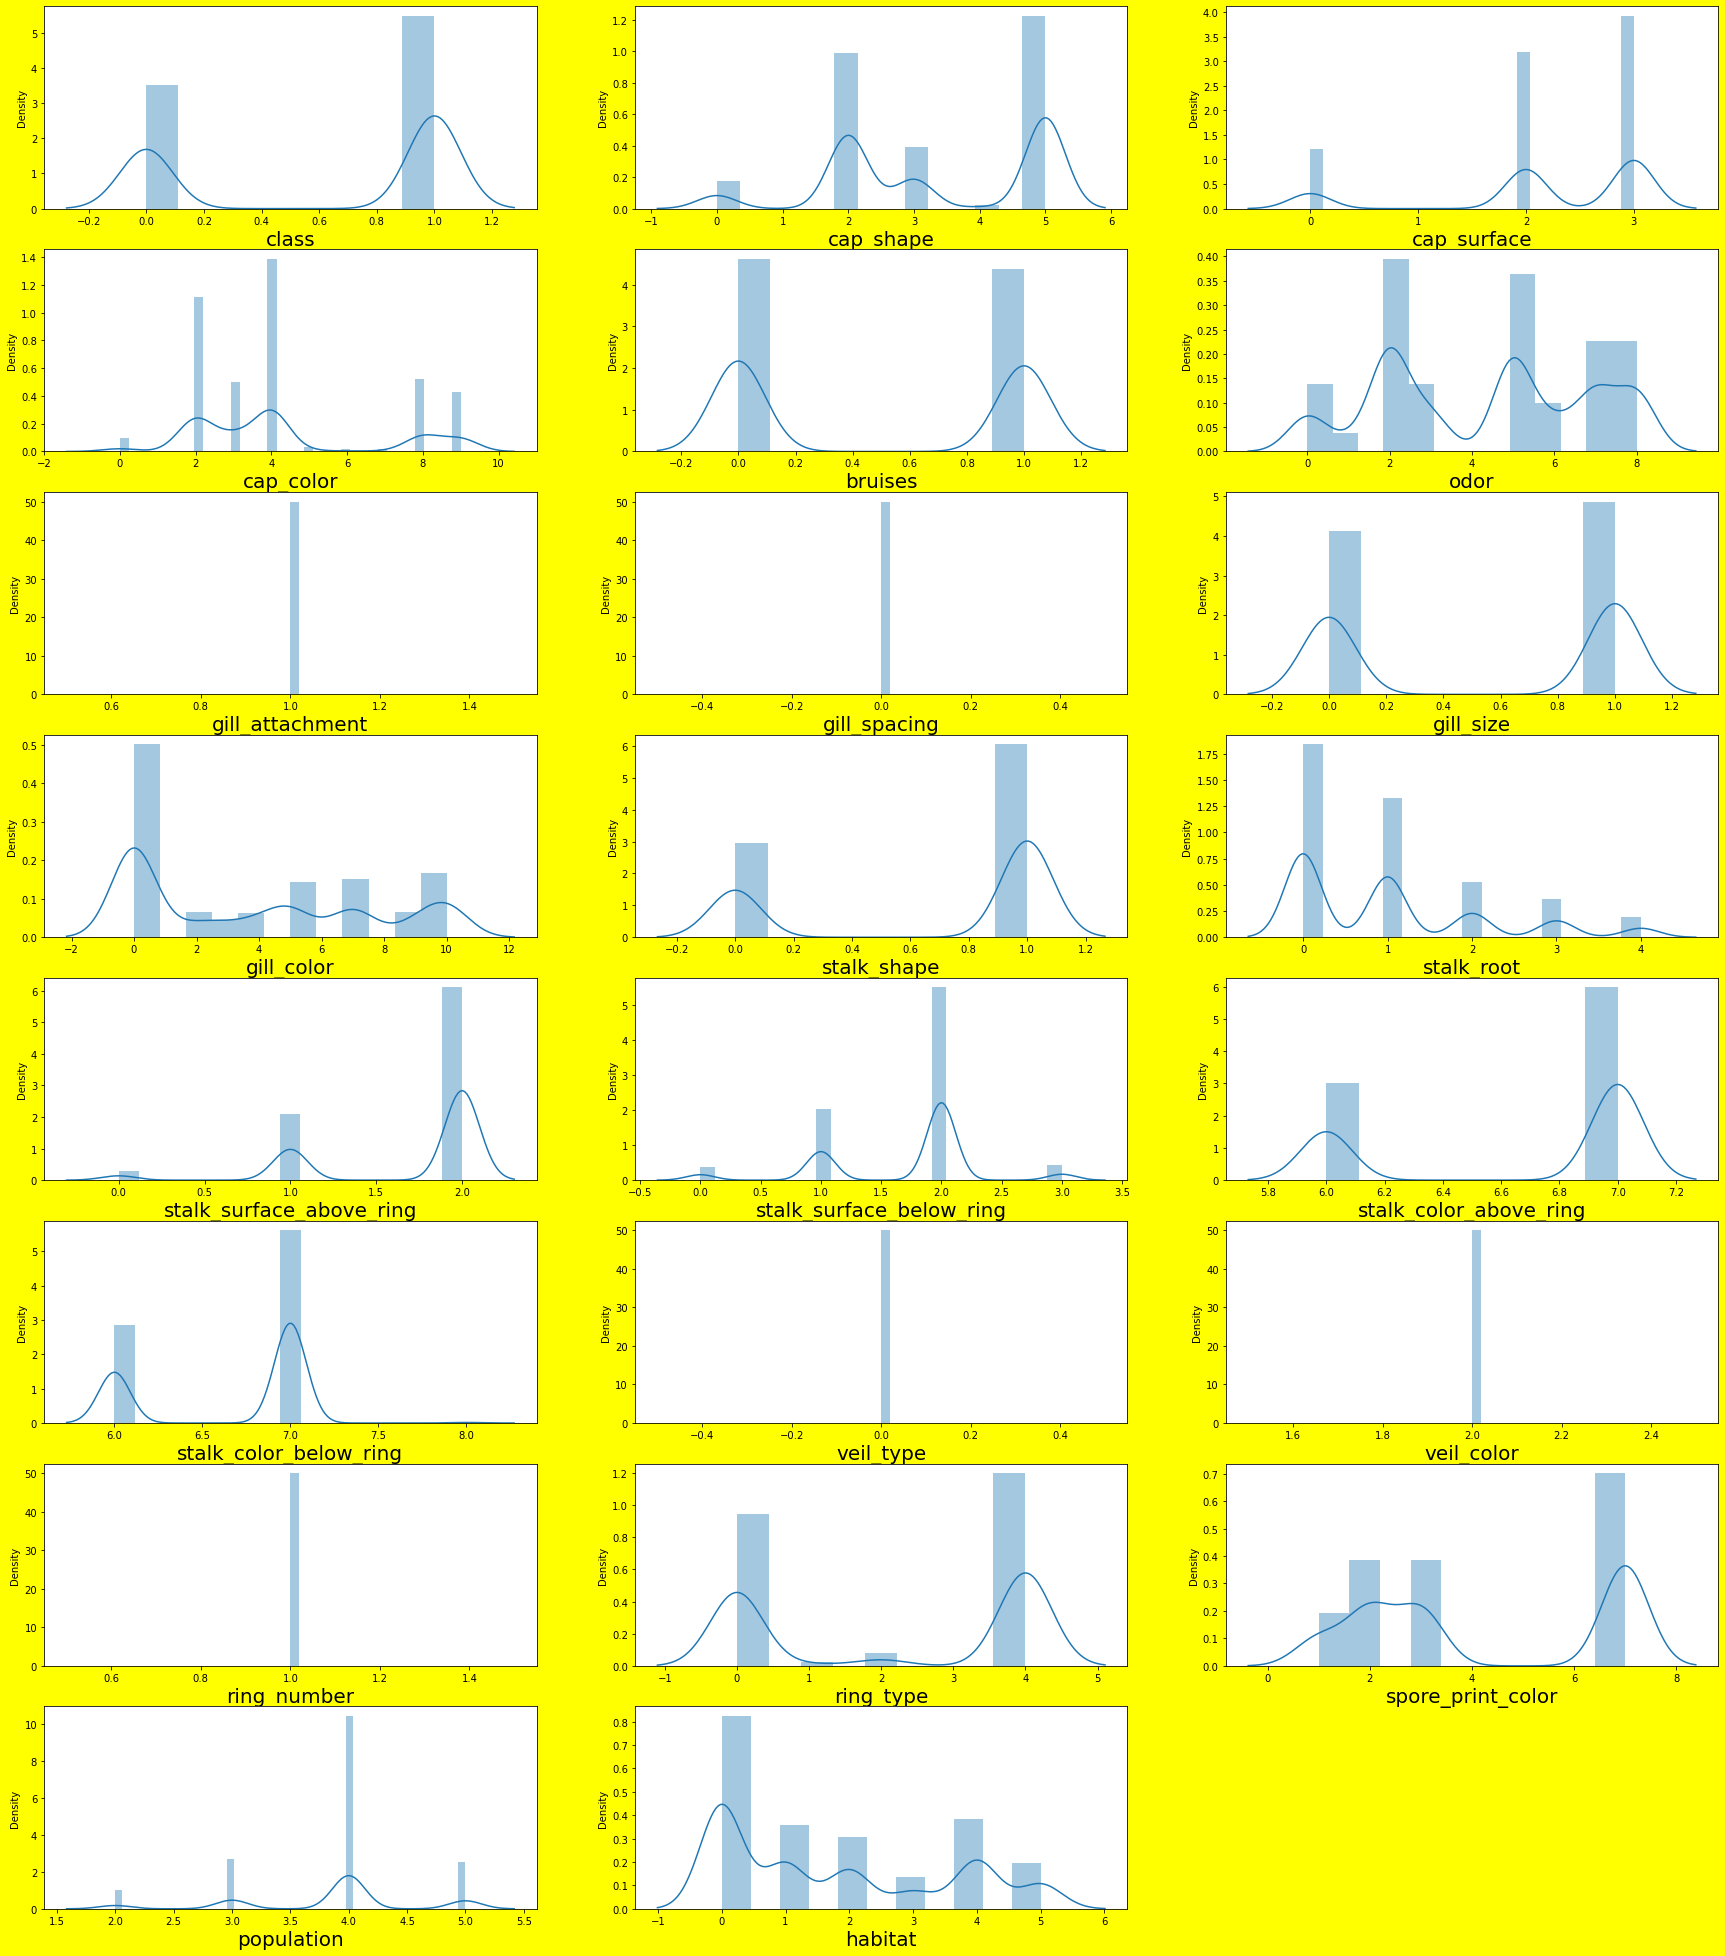

In [297]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=23:
        plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [294]:
x = df.drop(columns=['class'])
y = df['class']

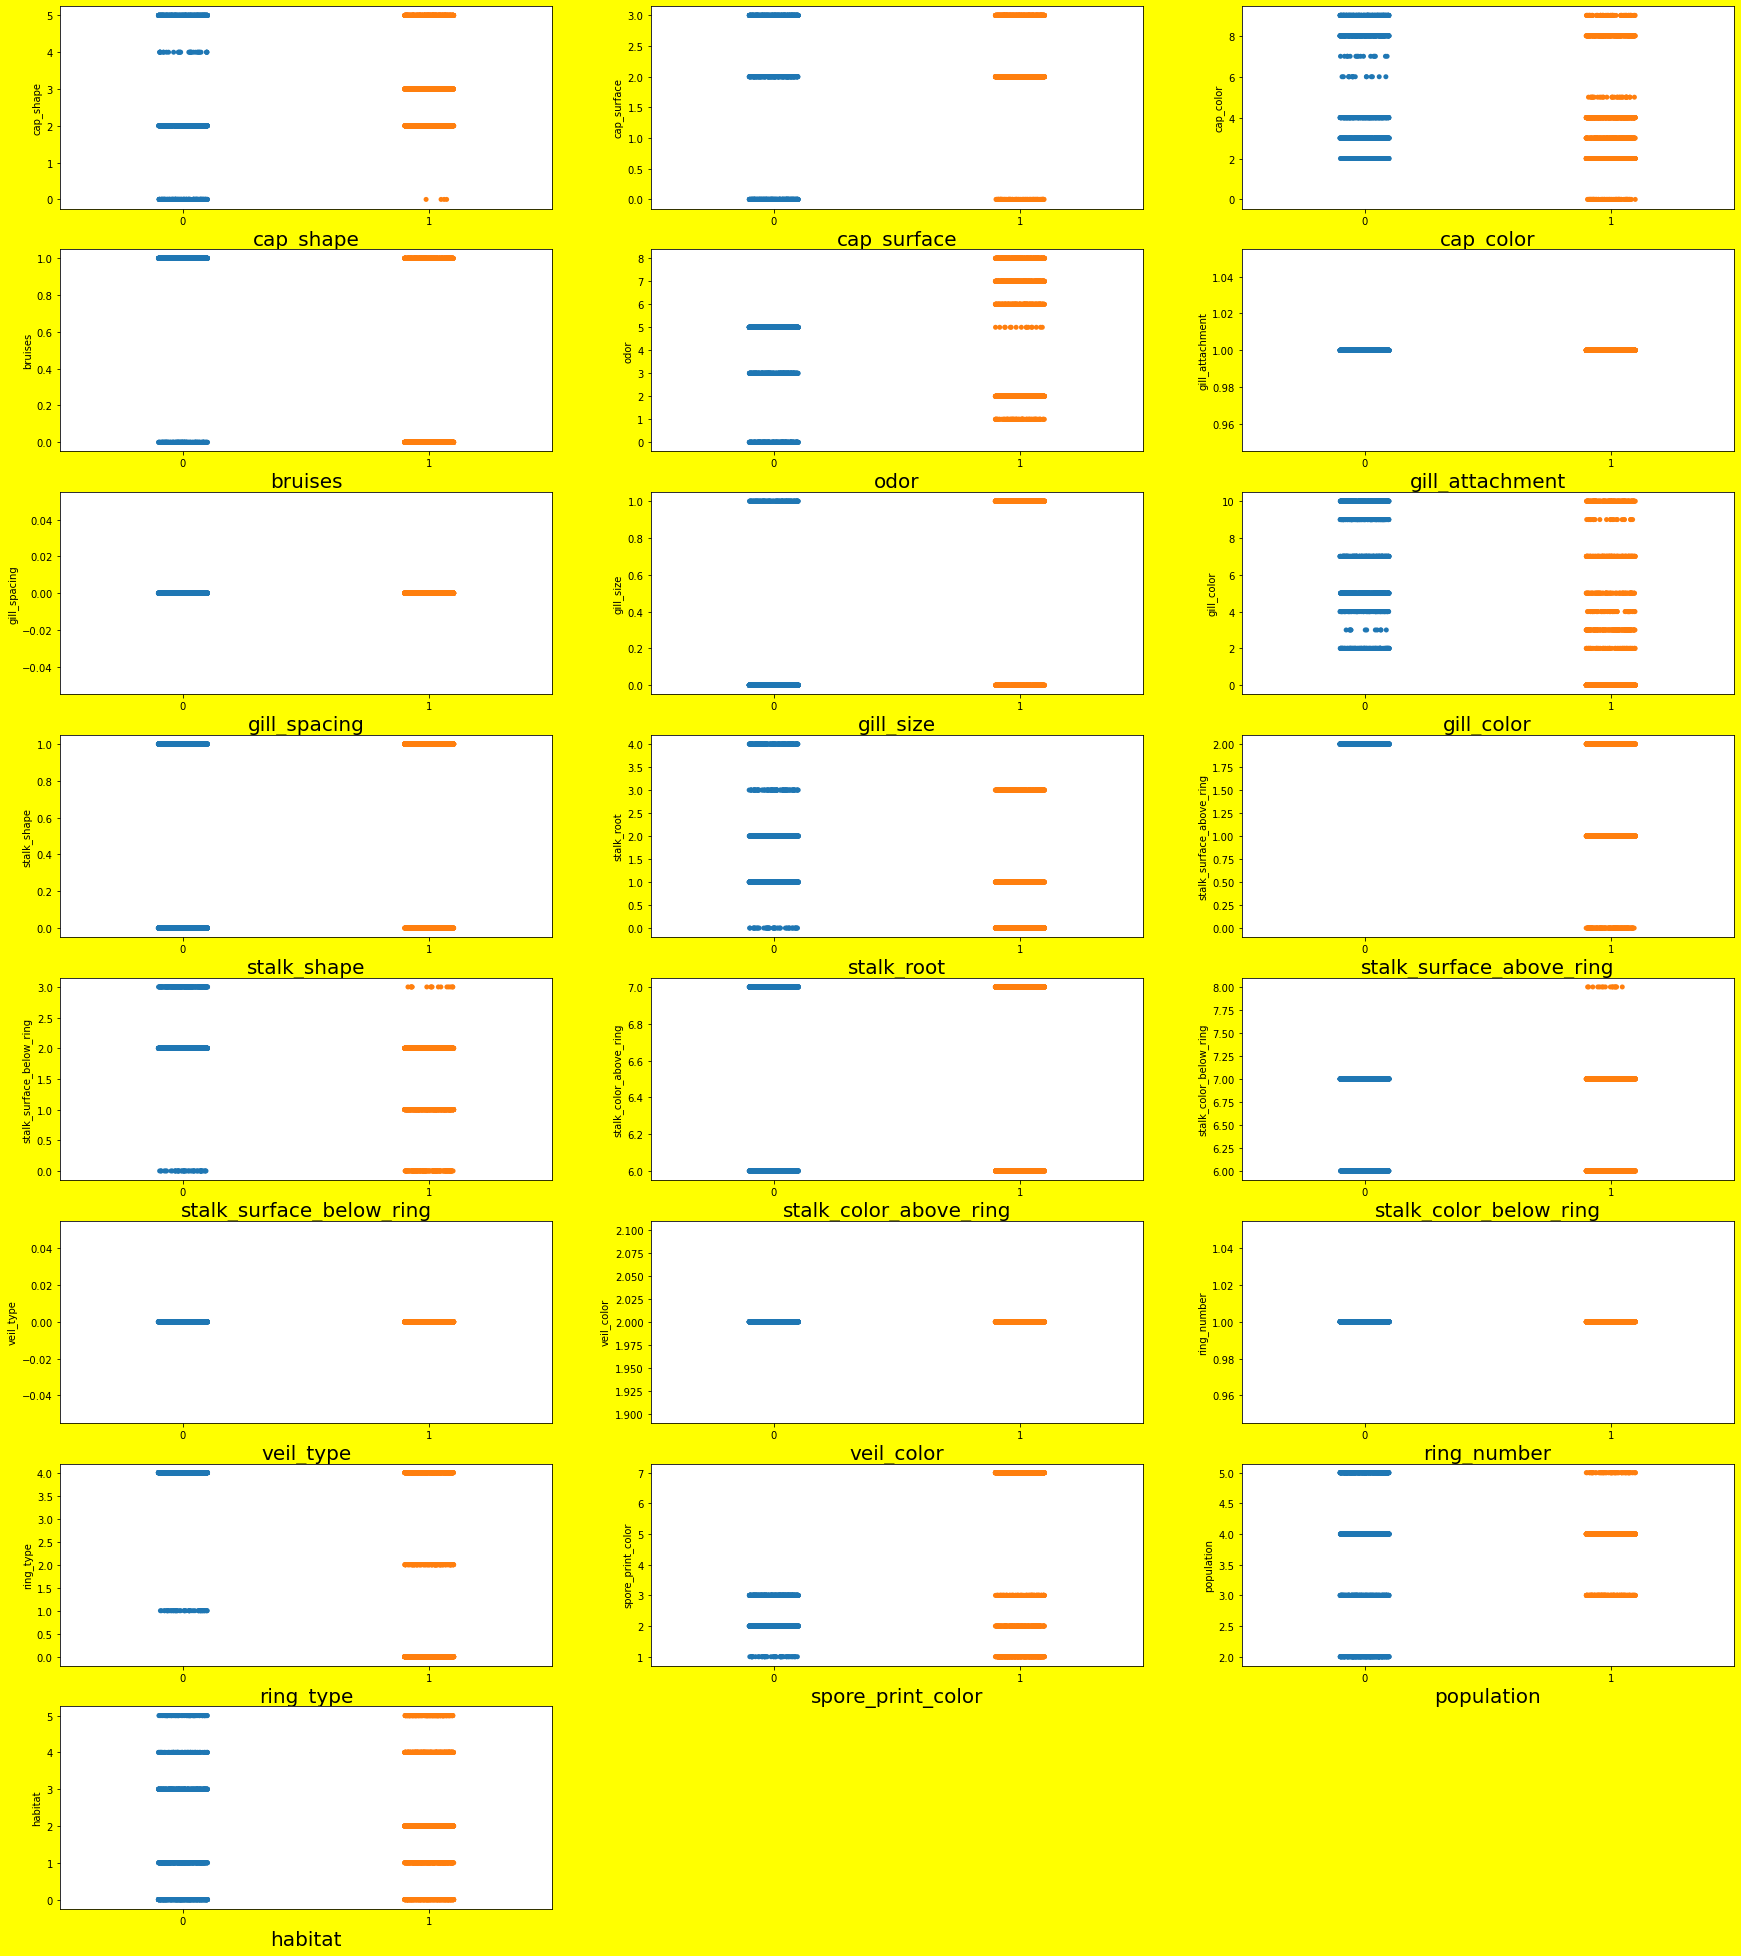

In [295]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=23:
        plt.subplot(8,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [296]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled.shape[1]

22

In [302]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.051663,cap_shape
1,1.432617,cap_surface
2,2.616433,cap_color
3,13.922609,bruises
4,1.733002,odor
5,NaN,gill_attachment
6,NaN,gill_spacing
7,5.635859,gill_size
8,3.656995,gill_color
9,9.249961,stalk_shape


Looks like ring_type is correlated with some other column so will remove this feature

In [303]:
df=df.drop(['ring_type'],axis=1)

In [304]:
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,2,3,5
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,0,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,0,2,1,7,4,0
8116,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,0,2,1,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,0,2,1,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,0,2,1,7,4,0


In [307]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [308]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [310]:
import pickle
with open('mushroom_model.sav', 'wb') as f:
    pickle.dump(lr,f)
    
with open('mushroom_standard_scaler.sav', 'wb') as f:
    pickle.dump(lr,f)

In [314]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [315]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [317]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[402,   0],
       [  0, 634]], dtype=int64)

In [320]:
Accuracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
Accuracy

1.0

In [322]:
precision = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
precision

1.0

In [323]:
recall = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][0])
recall

1.0

In [324]:
f1_score = 2*(recall*precision)/(recall+precision)
f1_score

1.0

In [325]:
auc = roc_auc_score(y_test,y_pred)
auc

1.0

In [327]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
print(fpr)
print(tpr)
print(thresholds)

[0. 0. 1.]
[0. 1. 1.]
[2 1 0]


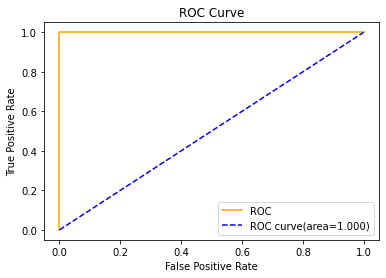

In [329]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label="ROC curve(area=%0.3f)"%auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()